In [2]:
import torch
#a module that provides a set of pre-defined classes and functions for building neural networks
from torch.nn import Linear
#a module that provides a large number of pre-defined neural network functions like RelU
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [3]:
#from torchvision import datasets, transforms
# Define a transform to normalize the pixel values to have a mean of 0.5 and a standard deviation of 0.5
#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
# Define a data loader to load the data in batches
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


* Module: A base class for all neural network modules in PyTorch. It provides methods for defining and applying trainable parameters, as well as methods for performing forward and backward computation.
* Linear: A class for defining a fully connected layer in a neural network. It applies a linear transformation to the input tensor, followed by an optional bias term.
* Conv2d: A class for defining a 2D convolutional layer in a neural network. It applies a convolutional filter to the input tensor, followed by an optional bias term.
* LSTM: A class for defining a long short-term memory (LSTM) layer in a neural network. It is commonly used for sequence modeling tasks, such as speech recognition and natural language processing.

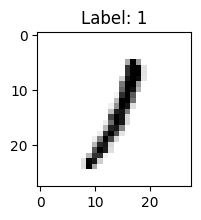

图像数据形状和对应数据为: torch.Size([28, 28])
图像标签形状和对应数据为: 1 1

打印第一个batch的第一个图像，对应标签数字为1


In [4]:
#define transform image to tensor
transform=torchvision.transforms.ToTensor()

#load dataset
train_dataset=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice',train=True, download=True, transform=transform)
test_dataset=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice', train=False, download=True, transform=transform)

#get a sample
image, label=train_dataset[99]

plt.figure(figsize=(2,2))
#the squeeze method to remove the batch dimension, which has size 1 in this case.
#batch number always the first number
plt.imshow(image.squeeze(),cmap=plt.cm.binary)
plt.axis('on')
plt.title('Label: %d' % label)
plt.show()


print("图像数据形状和对应数据为:", image.squeeze().shape)
print("图像标签形状和对应数据为:", image.shape[0],label)
print("\n打印第一个batch的第一个图像，对应标签数字为{}".format(label))

In [54]:
len(image.shape)==3

True

In [49]:
norm_img(image).shape

torch.Size([1, 784])

In [5]:
#torch.nn.ReLU
#the rectified linear activation function f(x) = max(0, x)
import torch.nn as nn
relu=nn.ReLU()
x=torch.randn(10,20)
y=relu(x)

In [50]:
class MNIST(torch.nn.Module):
    def __init__(self):
        super(MNIST,self).__init__()
        #define a full convolutional layer
        self.fc=torch.nn.Linear(in_features=784,out_features=1)

    def forward(self, inputs):
        outputs=self.fc(inputs)
        return outputs

In [62]:

def norm_img(img):
    #check input size as [batch_sizes,1,28,28]
    assert len(img.shape)==4
    batch_size=img.shape[0]
    #image normalization
    img=img/255
    #reshape image to [batch size, H*W]
    #reshape tensor into 2D
    img=img.view(batch_size,-1)
    return img


def train(model):
    #ser model as train mode
    model.train()
    #data loader
    train_loader=torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
    optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
    EPOCH_NUM=10
    losses=[]
    for epoch in range(EPOCH_NUM):
        for batch, (images, labels) in enumerate(train_loader):
            images=norm_img(images).float()
            labels=labels.float()
            optimizer.zero_grad()
            #forward
            predicts=model(images)
            #loss
            loss=F.mse_loss(predicts, labels)
            avg_loss=torch.mean(loss)

            if batch % 1000==0:
                loss=avg_loss.item()
                losses.append(loss)
                print("epoch_id: {}, batch_id: {}, loss is: {}".format(epoch, batch, loss))

            avg_loss.backward()
            optimizer.step()
            
    return losses




In [65]:
#load model
model=MNIST()
loss_list=train(model)
torch.save(model.state_dict(), 'mnistbostonsame.pth')

/var/folders/rz/cvwxv_893p7cj9rn8qdyqxlc0000gn/T/ipykernel_97643/2284491435.py:28: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss=F.mse_loss(predicts, labels)


epoch_id: 0, batch_id: 0, loss is: 19.473312377929688
epoch_id: 0, batch_id: 1000, loss is: 8.802263259887695
epoch_id: 0, batch_id: 2000, loss is: 9.291022300720215
epoch_id: 0, batch_id: 3000, loss is: 8.447379112243652
epoch_id: 1, batch_id: 0, loss is: 8.59374713897705
epoch_id: 1, batch_id: 1000, loss is: 4.977025508880615
epoch_id: 1, batch_id: 2000, loss is: 9.113127708435059
epoch_id: 1, batch_id: 3000, loss is: 6.414918899536133
epoch_id: 2, batch_id: 0, loss is: 9.713109016418457
epoch_id: 2, batch_id: 1000, loss is: 7.411218166351318
epoch_id: 2, batch_id: 2000, loss is: 8.621190071105957
epoch_id: 2, batch_id: 3000, loss is: 9.483983993530273
epoch_id: 3, batch_id: 0, loss is: 8.306083679199219
epoch_id: 3, batch_id: 1000, loss is: 8.734469413757324
epoch_id: 3, batch_id: 2000, loss is: 8.018926620483398
epoch_id: 3, batch_id: 3000, loss is: 8.860118865966797
epoch_id: 4, batch_id: 0, loss is: 7.965662479400635
epoch_id: 4, batch_id: 1000, loss is: 8.590780258178711
epoch_i

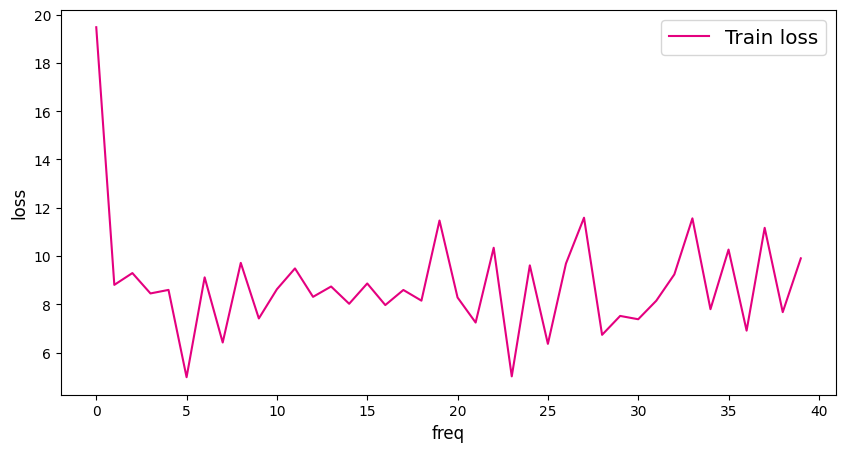

In [66]:
def plot(loss_list):
    plt.figure(figsize=(10,5))

    freq=[i for i in range(len(loss_list))]
    plt.plot(freq,loss_list,color='#e4007f', label="Train loss")

    # 绘制坐标轴和图例
    plt.ylabel("loss", fontsize='large')
    plt.xlabel("freq", fontsize='large')
    plt.legend(loc='upper right', fontsize='x-large')
    
    plt.show()

plot(loss_list)

* The DataLoader reads in data as [batch_size, 1, image_height, image_width] because it is designed to work with convolutional neural networks (CNNs) which typically take in inputs of this shape.

* The extra dimension of size 1 is added because CNNs expect inputs to have a certain number of channels, and grayscale images (such as the MNIST digits) have only one channel.

* The batch size dimension is added to enable efficient batch processing during training, where multiple input images are processed simultaneously in parallel to speed up the training process.

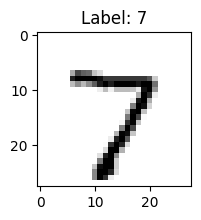

图像数据形状和对应数据为: torch.Size([28, 28])
图像标签形状和对应数据为: 1 7

打印第一个batch的第一个图像，对应标签数字为7


In [68]:
#test
#get a sample
image, label=test_dataset[0]

plt.figure(figsize=(2,2))
#the squeeze method to remove the batch dimension, which has size 1 in this case.
#batch number always the first number
plt.imshow(image.squeeze(),cmap=plt.cm.binary)
plt.axis('on')
plt.title('Label: %d' % label)
plt.show()


print("图像数据形状和对应数据为:", image.squeeze().shape)
print("图像标签形状和对应数据为:", image.shape[0],label)
print("\n打印第一个batch的第一个图像，对应标签数字为{}".format(label))

In [69]:
image.shape

torch.Size([1, 28, 28])

In [101]:
# evaluate the model on the test dataset
num_correct = 0
num_total = 0
for images, labels in test_loader:
    # normalize images
    images = norm_img(images).float()
    
    # forward pass
    outputs = model(images)
    
    # compute predicted labels
    _, predicted = torch.max(outputs.data, 1)
    
    # update number of correct predictions
    num_correct += (predicted == labels).sum().item()
    
    # update total number of images
    num_total += labels.size(0)

# print the accuracy
print('Accuracy of the network on the test images: %d %%' % (100 * num_correct / num_total))



Accuracy of the network on the test images: 9 %


torch.max() is a PyTorch function that returns the maximum element of a tensor along a given dimension. It takes a tensor as input and returns a tuple of (values, indices) where values is the maximum value of the tensor along the specified dimension and indices is the index location of the maximum value.

In [102]:
model=MNIST()
param_dict=torch.load('mnistbostonsame.pth')
model.load_state_dict(param_dict)
model.eval()
test_loader=torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
accuracy=0
for batch, (images, labels) in enumerate(test_loader):
    images=norm_img(images).float()
    labels=labels.float()
    predicts=model(images)
    #the indices of the maximum value of tensor predicts
    predicted_labels=torch.argmax(predicts,dim=1)
    accuracy += (predicted_labels == labels).sum().item()


result= accuracy/len(test_dataset)*100
print("Accuracy of the model is {:.2f}% ".format(result))

Accuracy of the model is 9.80% 


* torch.argmax() returns the index of the maximum value in a tensor along a specified dimension. In the given code, it is used to obtain the predicted class labels for the test images. The torch.max() function returns the maximum values and their corresponding indices along a given dimension. In this case, torch.max() is used to obtain the predicted class scores and their corresponding indices along the second dimension. The torch.argmax() function is then used to obtain the index of the maximum class score, which corresponds to the predicted class label. The output of torch.argmax(predicts, dim=1) is a tensor containing the predicted labels of each image in the batch.

* the output of the model is a tensor containing the scores or probabilities for each class. The index of the maximum score/probability along the dimension corresponding to the classes is the predicted class label.

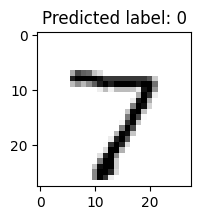

In [113]:
import matplotlib.pyplot as plt

# Load the first image from the test dataset
test_image, test_label = test_dataset[0]

# Normalize and reshape the image
test_image = norm_img(test_image.reshape(1, 1, 28, 28)).float()

# Make a prediction using the trained model
model.eval()
with torch.no_grad():
    output = model(test_image.unsqueeze(0))
predicted_label = torch.argmax(output)

# Display the image and predicted label
plt.figure(figsize=(2,2))
plt.imshow(test_image.view(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted label: {predicted_label.item()}')
plt.show()


* test_image.unsqueeze(0) is a PyTorch function that returns a new tensor with a dimension of size one inserted at the specified position. In this case, test_image.unsqueeze(0) adds an extra dimension to the test_image tensor at position 0, effectively creating a tensor of shape [1, 1, 28, 28]

* torch.no_grad() is a context manager that allows for the code to skip gradient computation and memory optimization when performing inference with a trained model. When this context manager is active, any code within it will not track any changes to tensors that occur during the computations, which can speed up inference time and save memory.

During inference, we don't need to compute gradients or update model parameters. Therefore, we can use torch.no_grad() to disable gradient tracking and improve the inference speed. 